In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/douglasbc/scraping-understat-dataset/main/datasets/serie_a/players_serie_a_20-21.csv')

In [3]:
df.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,2371,Cristiano Ronaldo,33,2807,29,29.838081,3,3.854639,167,36,3,0,F S,Juventus,23,23.747810,28.635406,8.915718
1,594,Romelu Lukaku,36,2885,24,23.425768,11,8.387602,97,53,4,0,F S,Inter,18,18.857976,30.672952,5.996654
2,1229,Luis Muriel,36,1434,22,16.692218,8,4.887805,86,46,0,0,F M S,Atalanta,20,14.408361,23.752104,6.238759
3,7084,Dusan Vlahovic,37,2945,21,18.476590,3,2.296164,86,18,1,0,F S,Fiorentina,15,13.908837,14.827192,1.562626
4,1209,Ciro Immobile,35,2887,20,19.771116,6,7.202586,119,54,3,1,F S,Lazio,16,13.680725,24.116897,4.969870


In [4]:
#splitting the full name and then only storing the second name which we would like to show in our plot
df['player_name'] = df['player_name'].apply(lambda x: x.split(' ')[1] if(len(x.split(' '))>1) else x)
df['player_name']

0       Ronaldo
1        Lukaku
2        Muriel
3      Vlahovic
4      Immobile
         ...   
589    Urbanski
590        Bove
591    Raimondo
592      Kallon
593     Bertini
Name: player_name, Length: 594, dtype: object

In [5]:
df['team_title'] = df['team_title'].apply(lambda x: x.split(',')[1] if(len(x.split(','))>1) else x)
df['team_title']

0        Juventus
1           Inter
2        Atalanta
3      Fiorentina
4           Lazio
          ...    
589       Bologna
590          Roma
591       Bologna
592         Genoa
593         Lazio
Name: team_title, Length: 594, dtype: object

In [6]:
teams = list(df['team_title'].unique())
teams = sorted(list(set([i if ("," not in i) else i.split(',')[1] for i in teams])))
teams = ["Parma" if i == "Parma Calcio 1913" else i for i in teams]
teams

['AC Milan',
 'Atalanta',
 'Benevento',
 'Bologna',
 'Cagliari',
 'Crotone',
 'Fiorentina',
 'Genoa',
 'Inter',
 'Juventus',
 'Lazio',
 'Napoli',
 'Parma',
 'Roma',
 'Sampdoria',
 'Sassuolo',
 'Spezia',
 'Torino',
 'Udinese',
 'Verona']

In [7]:
df['team_title'] = df['team_title'].apply(lambda x: x.split(',')[1] if(len(x.split(','))>1) else x)
df['team_title'] = df['team_title'].apply(lambda x: "Parma" if(x == "Parma Calcio 1913") else x)
df['team_title']

0        Juventus
1           Inter
2        Atalanta
3      Fiorentina
4           Lazio
          ...    
589       Bologna
590          Roma
591       Bologna
592         Genoa
593         Lazio
Name: team_title, Length: 594, dtype: object

In [8]:
first_color = '#EE0A1D' #color for representing the top goalscorer
second_color = '#2901E7' #color for representing the second top goalscorer
goal_color = '#FAF9FF' #color for the number of goals text inside the circle
line_color = '#000000'
y_ticks = [0, 5, 10, 15, 20, 25, 30]
fig, ax = plt.subplots(figsize=(18, 14))

In [9]:
spines = ['top', 'right', 'left', 'bottom']
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.set_xticklabels(teams, fontweight='bold', fontsize=15, rotation=90)
ax.set_yticklabels(y_ticks, fontweight='bold', fontsize=15)
ax.set_ylabel('Goals Scored', color=line_color, fontweight='bold', fontsize=20, fontfamily='serif')

<ipython-input-9-bf0b0d96ff14>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(teams, fontweight='bold', fontsize=15, rotation=90)
<ipython-input-9-bf0b0d96ff14>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks, fontweight='bold', fontsize=15)


Text(187.72222222222223, 0.5, 'Goals Scored')

In [10]:
for team in teams:
    #home_matches = df[(df['h_team'] == team) & (df['h_a'] == 'h')]
    #away_matches = df[(df['a_team'] == team) & (df['h_a'] == 'a')]
    #team_df = pd.concat([home_matches, away_matches])
    #data manipulation to get the dataframe of a team's goalscorers sorted by the total number of goals
    topscorers = df[df['team_title'] == team].groupby('player_name').agg({'goals':'sum'}).reset_index().sort_values(by='goals', axis=0, ascending=False)

    ax.scatter(team, topscorers.iloc[0]['goals'], c=first_color, s=600, zorder=3, ec=line_color)
    ax.scatter(team, topscorers.iloc[1]['goals'], c=second_color, s=600, zorder=2, ec=line_color)
    ax.plot((team, team), (topscorers.iloc[0]['goals'], topscorers.iloc[1]['goals']), c=line_color, zorder=1, alpha=1, linewidth=3)
    ax.text(team, topscorers.iloc[0]['goals'], topscorers.iloc[0]['goals'], c=goal_color, va='center', ha='center', fontsize=15, fontfamily='serif')
    ax.text(team, topscorers.iloc[0]['goals']+0.8, topscorers.iloc[0]['player_name'], c=first_color, va='center', ha='center', fontsize=10, fontfamily='serif')
    ax.text(team, topscorers.iloc[1]['goals'], topscorers.iloc[1]['goals'], c=goal_color, va='center', ha='center', fontsize=15, fontfamily='serif')
    ax.text(team, topscorers.iloc[1]['goals']-1, topscorers.iloc[1]['player_name'], c=second_color, va='center', ha='center', fontsize=10, fontfamily='serif')

In [11]:
topscorers

,player_name,goals
0,Barak,7
31,Zaccagni,6
9,Dimarco,5
16,Lasagna,4
11,Faraoni,4
17,Lazovic,3
28,Veloso,2
12,Favilli,2
14,Ilic,2
15,Kalinic,2


In [12]:
ax.set_ylim(0, 32)
ax.grid(which='both', alpha=0.2)
ax.text(-1, 34, "Each Team's Top Two Highest Goalscorers", c='#000000',ha='left', va='center', fontsize=30, fontfamily='serif', fontweight='bold')
ax.text(-1, 32, "Serie A | 20/21 Season", c='#000000', ha='left', va='center', fontsize=25, fontfamily='serif', fontweight='bold')

#ax.text(20, -7, 'Inspired by @jonollington & @slothfulwave612', va='center', ha='right',fontweight='bold', size=15)
#ax.text(20, -8, '@prstrggr', va='center', ha='right',fontweight='bold', size=15)

plt.savefig('dumbbell-chart.png', dpi=1400, bbox_inches='tight')

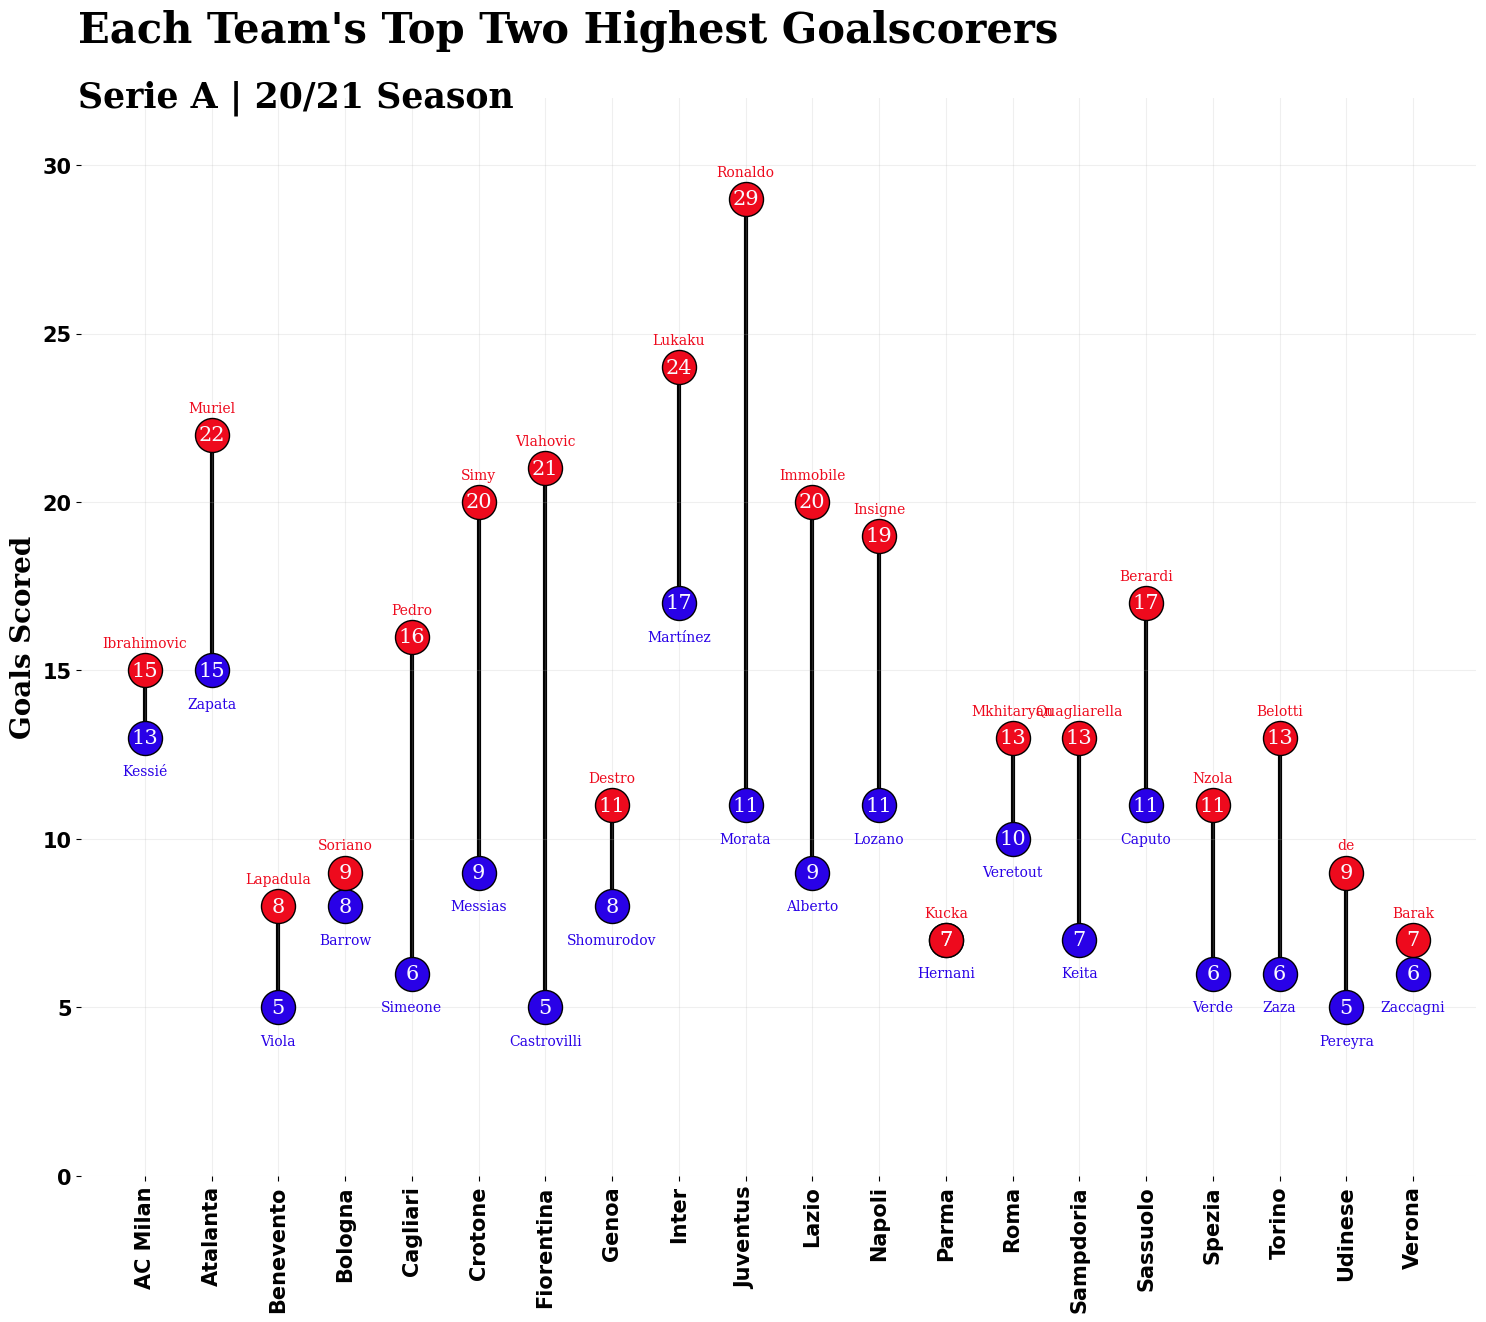

In [13]:
plt.show()